Support vector regressor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_regression
x, y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise=3)

In [3]:
x

array([[ 0.61037521,  0.07961864],
       [ 3.55901667,  0.82589965],
       [-0.55839714,  0.4955372 ],
       ...,
       [ 0.18749207, -0.19946905],
       [-0.1155293 ,  0.97984796],
       [-1.6874593 , -0.91635622]])

In [4]:
y

array([ 3.99182813e+01,  2.39409323e+02,  1.46731045e+01,  2.99561962e+01,
       -1.32808823e+02,  1.88209839e+02, -2.27705395e+01, -9.72228766e+01,
        1.51687256e+02, -1.05444065e+02,  1.46905672e+02, -6.41228227e+01,
        1.09841624e+02, -6.70315946e+01,  1.34945295e+02, -1.05326952e+02,
       -1.26199611e+02,  1.01451456e+02, -6.98878790e+01,  7.28052810e+01,
       -1.07312108e+02, -9.81161926e+01, -9.36235391e+01, -3.09863632e+01,
       -1.44402436e+02,  6.46175279e+00,  1.12975682e+01,  1.25672711e+02,
       -1.18251410e+01,  8.47877663e+01, -1.31691715e+02,  3.65057407e+01,
       -8.12310784e+01, -6.72452970e+01, -1.09679047e+01, -5.79167522e+01,
        6.49149125e+01,  1.61240767e+02, -8.63630559e+01, -1.12894454e+02,
       -1.28860864e+02,  7.03312629e-01, -6.41551862e+01,  4.77216969e+01,
        1.21238404e+02, -1.04854710e+02,  4.74652017e+01, -1.58681762e+02,
        5.20673955e+00, -9.45710429e+00, -6.70934911e+01, -1.82190567e+01,
        9.06626711e+01, -

In [5]:
pd.DataFrame(x)

,0,1
0,0.610375,0.079619
1,3.559017,0.825900
2,-0.558397,0.495537
3,-0.444446,0.637439
4,-0.094830,-1.580134
...,...,...
995,-0.043645,-0.302019
996,0.911882,-1.843710
997,0.187492,-0.199469
998,-0.115529,0.979848


<Axes: xlabel='0', ylabel='1'>

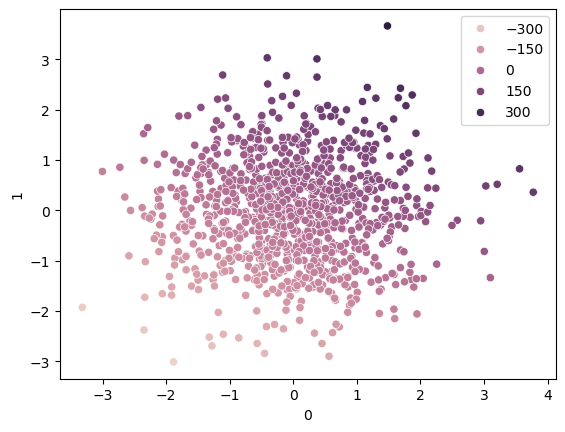

In [6]:
sns.scatterplot(x = pd.DataFrame(x)[0], y = pd.DataFrame(x)[1], hue= y)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1,)

In [8]:
x_train.shape, x_test.shape

((700, 2), (300, 2))

### Build the model 

In [9]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')

In [10]:
svr

SVR(kernel='linear')

### train the model 

In [11]:
svr.fit(x_train, y_train)

SVR(kernel='linear')

In [12]:
svr.coef_

array([[47.63759293, 83.00687931]])

In [13]:
svr.predict

<bound method BaseLibSVM.predict of SVR(kernel='linear')>

In [14]:
y_pred = svr.predict(x_test)

In [15]:
y_pred

array([ 8.60613937e+01,  6.40575858e+01, -1.98206258e+02, -1.12723965e+02,
       -2.28781169e+00, -1.50574738e+01, -4.54361617e+01, -3.11734974e+01,
       -4.42880877e+01, -1.33350481e+01,  9.94371045e+01,  2.45742172e+01,
       -8.16880141e+01, -4.02880757e+01, -3.88228428e+01, -1.03037089e+02,
        5.63974698e+01, -2.58582551e+01,  2.88376882e+01,  7.36173381e+01,
        2.37612001e+02,  7.57529783e+01,  8.87340269e+01,  4.85262962e+01,
        9.54959687e+01, -3.33519889e+01, -1.06942971e+02, -7.30685271e+00,
        6.98472611e+01, -5.85197671e+01, -1.27379465e+02, -3.49092238e+01,
       -1.22984029e+00, -1.22037839e+02, -8.87660514e+01,  6.10068384e+01,
       -1.14597574e+02, -8.06983277e+01,  4.58633963e+01,  1.43507487e+01,
        2.72605159e+01, -8.47531973e+01, -4.02559445e+01,  3.20498952e+01,
        1.34445296e+02, -9.83234052e+01, -1.09588486e+02,  2.19915319e+00,
       -6.55659119e+00, -2.71699362e+01,  3.41521670e+01, -1.14738225e+01,
       -1.21734917e+02, -

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9988680426750096

In [17]:
# hyperparameter tuning with svr

from  sklearn.model_selection import GridSearchCV

params = {'C': [1, 2, 3, 10, 50, 120, 100],
         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
        'kernel': ['linear'],
        'epsilon': [0.01, 0.1, 0.2, 0.3]}

grid = GridSearchCV(SVR(), param_grid=params, cv=5, verbose=3 )

In [18]:
grid

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 2, 3, 10, 50, 120, 100],
                         'epsilon': [0.01, 0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [19]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits
[CV 1/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.01, gamma=0.2, kern

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 2, 3, 10, 50, 120, 100],
                         'epsilon': [0.01, 0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [21]:
grid.best_params_

{'C': 10, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [22]:
grid.best_score_

0.9990130046519203

In [25]:
final_model = grid.best_estimator_

In [26]:
y_pred = final_model.predict(x_test)

In [27]:
r2_score(y_test, y_pred)

0.9988728037045006

In [28]:
## 11/11/25 angaj kumar